### One Hot Encoding
* Daha önceki bölümde yani label encodingte bir problem vardı (takım encodingleme). Sınıflar arası fark olmadığı halde bunlara sanki aralarında fark varmış gibi muamele ediyordu. Bunu bundan dolayı böyle yapmak genel hatlarıyla doğru olmayacak demiştik. Çünkü normalde sınıflar arası fark yokken fark varmış gibi olacaktır. Bunun etkisi de doğrusal yöntemlerde ya da fonksiyonel yöntemlerde kendini daha ciddi hissettirirken ağaç yöntemlerde değişkenlerde bir sıralama ve buna göre dallara bölme işlemi olduğu için orada bir etkisi olmayabilir yorumunu yapabiliriz. Dolayısıyla genel hatları itibari ile geçen bölümdeki şekliyle bir değer dönüştürmesi doğru olmayacaktır. Burada one hot encoding yapabiliriz.
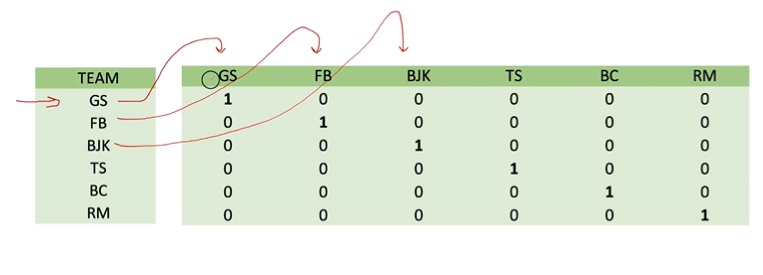
* DİKKAT: Burada bir dummy değişken tuzağı söz konusu. One hot encoding'i uygularken kullanacak olduğumuz metodlardan drop_first diyerek ilk sınıfı drop etmiş olarak ortaya çıkabilecek dummy değişken tuzağından kurtulmuş oluruz. dummy (kukla) değişken tuzağı; Burada oluşturmuş olduğumuz bu değişkenlere dummy değişkenler denir. Bu kukla değişkenler eğer birbiri üzerinden oluşturulabilir olursa bu durumda ortaya bir ölçme problemi çıkmaktadır. Yani birbiri üzerinden oluşturulabilen değişkenler yüksek bir korelasyona sebep oluyor olacaktır. Bundan dolayı dummy değişken oluştururken ilk sınıf drop edilir. Birbiri üzerinden oluşturulms durumu ortadan kaldırılmaya çalışılır.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data


def load():
    data = pd.read_csv("titanic.csv")
    return data

In [4]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [6]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* Bu üç değişkeni normalde sınıflar arası fark yokken label_encoder ile encoding etmeye çalıştığımızdan aralarında fark çıkacağından dolayı bunu one hot encoder dan geçirebiliriz.

In [7]:
# get_dummies der ki bana bir dataFrame söyle bu dataframe'de dönüştürmek istediğin sütunların adını söyle ben sadece onları 
# dönüştüreceğim diğerleri aynen kalacak.
pd.get_dummies(df, columns = ["Embarked"]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1


* Dummy değişken tuzağına düşmemek yani değişkenlerin birbiri üzerinden üretilebilir olmaması için drop first argümanını True yapıp göndereceğiz.

In [8]:
pd.get_dummies(df, columns=["Embarked"], drop_first = True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,1


* Yukarıda görüldüğü gibi ilk sınıf uçtu. İlk sınıfı alfabetik sıraya göre seçti. Dolayısıyla ilk sınıftan kurtulmuş. Bu birinci önemli noktaydı. 
* DİKKAT: İkinci önemli nokta ise eğer ilgili değişkendeki eksik değerler de bir sınıf olarak gelsin dersek ki embarked da eksiklik olduğunu biliyoruz, dummy_na = True yaparak eksik değerler için de bir sınıf oluşturabiliriz. Bunu her zaman tercih ediyor olmayız tabii ki ama aklımızda bulunursa iyi olur. Çünkü bazen eksiklikler de bir şeyler ifade ediyor olur. Geçmiş bölümlerdeki cabin değişkeninde olan NA değerlerinde oldupu gibi.

In [9]:
pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1,0


* DİKKAT: Label encoder'ı ve one hot encoder'ı gördük bunları tek adımda yapamaz mıyız? Evet yapabiliriz.

In [10]:
pd.get_dummies(df, columns=["Sex"], drop_first = True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,S,1


In [11]:
pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first = True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,1,0,1


* İki sınıflı kategorik değişken için get_dummies metodunu kullanarak hem label_encoder işlemini hem de one_hot_encoding işlemini yapabiliriz.

In [12]:
# Kendi fonksiyonumuzu yazalım:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [13]:
df = load()

In [15]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [16]:
# cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


* DİKKAT: Burada da iki yaklaşım sergilenebilir. Veri setindeki bütün kategorik değişkenlere bu dönüşüm işlemlerini uygulayabiliriz. Ya da seçecek olduğumuz bazılarına uygulayabiliriz. Ya da yine programatik olarak örneğin number unique sayısından en az 3'ten büyük olanlara uygulayalım diyebiliriz. 

In [17]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [18]:
one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.000,A/5 21171,7.250,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,PC 17599,71.283,C85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000,STON/O2. 3101282,7.925,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,113803,53.100,C123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.000,373450,8.050,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
# atama yapılmadığı için kalıcı bir değişiklik yok...
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
